# Import required libraries

In [7]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,f1_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter
from prettytable import PrettyTable

%matplotlib inline
pd.options.display.max_columns = None

In [8]:
#load application data
application_data = pd.read_csv('application_data.csv')

In [9]:
#remove columns with more than 30% missing values

#get columns_names and number of missing values
null_columns_temp = application_data.isnull().sum() 

#get column_names that has more than 30% missing values
null_columns = list(null_columns_temp[null_columns_temp.values>(0.3*len(application_data))].index)

#remove columns with more than 30% missing values
application_data.drop(labels=null_columns,axis=1,inplace=True)

print(application_data.shape)

(307511, 72)


In [10]:
categorical_columns = application_data.select_dtypes(exclude=["int64","float64"]).copy()
numerical_columns = application_data.select_dtypes(exclude=["object","category"]).copy()

In [11]:
#get value counts of each category in categorical columns
for i in categorical_columns:
    print(application_data[i].value_counts(normalize = False))
    print('-'*40)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
----------------------------------------
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
----------------------------------------
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
----------------------------------------
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
----------------------------------------
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
----------

In [12]:
application_data=application_data.drop(application_data.loc[application_data['CODE_GENDER']=='XNA'].index)
application_data=application_data.drop(application_data.loc[application_data['NAME_FAMILY_STATUS']=='Unknown'].index)

In [13]:
#imputing categorical columns with mode values and numerical columns with median values
for i in application_data.columns:
    if i in categorical_columns:
        application_data[i].fillna(application_data[i].mode(), inplace = True)
    else:
        application_data[i].fillna(application_data[i].median(), inplace = True)

In [14]:
#converting days to years
application_data['DAYS_BIRTH'] = application_data['DAYS_BIRTH'].apply(lambda x : round((-1.0)*x/365) if x < 0 else round(x/365) )
application_data['DAYS_EMPLOYED'] = application_data['DAYS_EMPLOYED'].apply(lambda x : round((-1.0)*x/365) if x < 0 else round(x/365) )
application_data['DAYS_REGISTRATION'] = application_data['DAYS_REGISTRATION'].apply(lambda x : round((-1.0)*x/365) if x < 0 else round(x/365) )
application_data['DAYS_ID_PUBLISH'] = application_data['DAYS_ID_PUBLISH'].apply(lambda x : round((-1.0)*x/365) if x < 0 else round(x/365) )
application_data['DAYS_LAST_PHONE_CHANGE'] = application_data['DAYS_LAST_PHONE_CHANGE'].apply(lambda x : round((-1.0)*x/365) if x < 0 else round(x/365) )

SK_ID_CURR


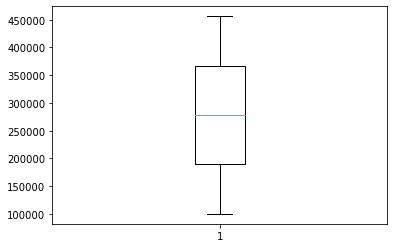

------------------------------------------------------------------------------------------------------------------------
TARGET


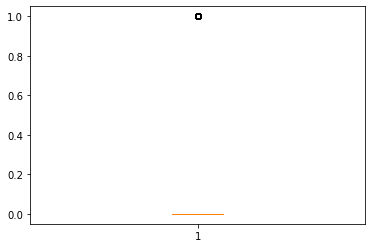

------------------------------------------------------------------------------------------------------------------------
CNT_CHILDREN


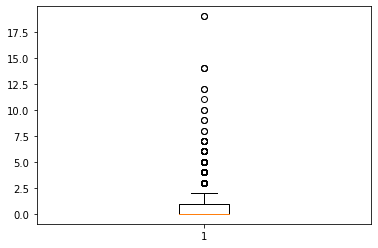

------------------------------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL


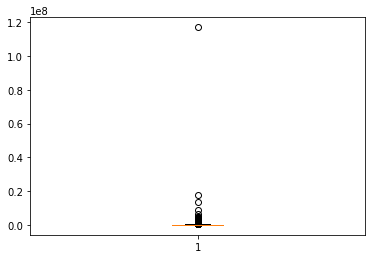

------------------------------------------------------------------------------------------------------------------------
AMT_CREDIT


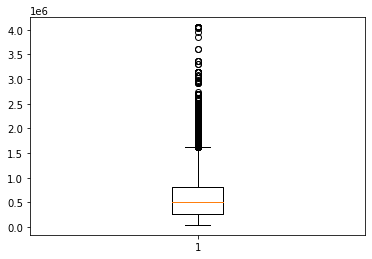

------------------------------------------------------------------------------------------------------------------------
AMT_ANNUITY


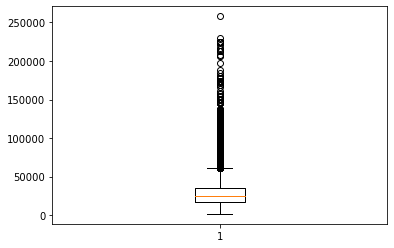

------------------------------------------------------------------------------------------------------------------------
AMT_GOODS_PRICE


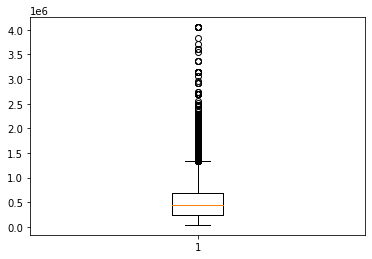

------------------------------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE


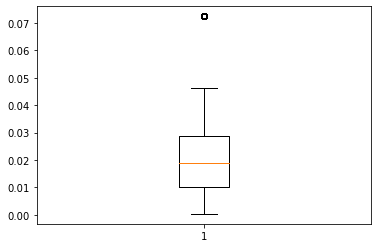

------------------------------------------------------------------------------------------------------------------------
DAYS_BIRTH


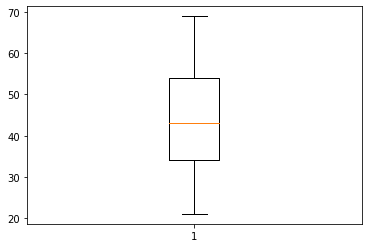

------------------------------------------------------------------------------------------------------------------------
DAYS_EMPLOYED


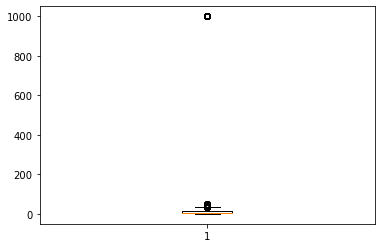

------------------------------------------------------------------------------------------------------------------------
DAYS_REGISTRATION


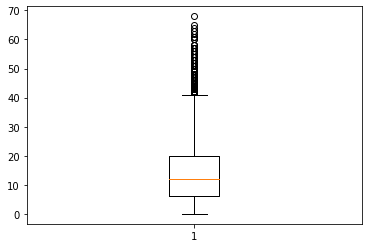

------------------------------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH


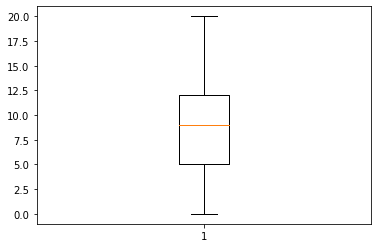

------------------------------------------------------------------------------------------------------------------------
FLAG_MOBIL


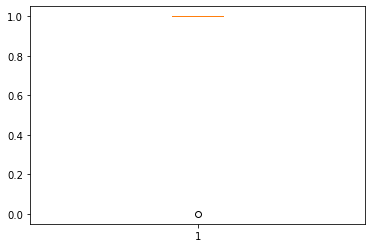

------------------------------------------------------------------------------------------------------------------------
FLAG_EMP_PHONE


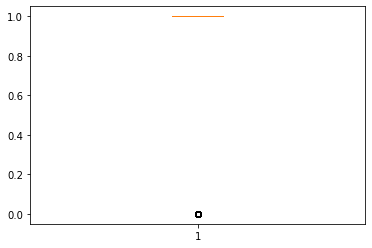

------------------------------------------------------------------------------------------------------------------------
FLAG_WORK_PHONE


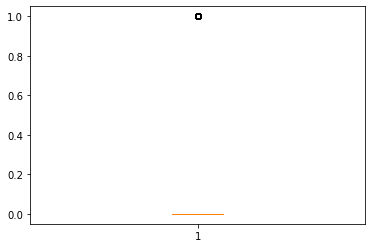

------------------------------------------------------------------------------------------------------------------------
FLAG_CONT_MOBILE


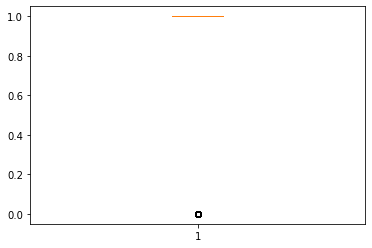

------------------------------------------------------------------------------------------------------------------------
FLAG_PHONE


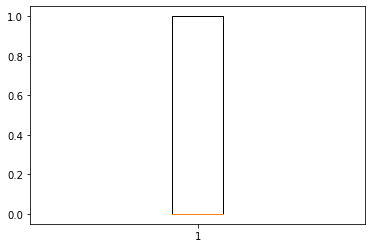

------------------------------------------------------------------------------------------------------------------------
FLAG_EMAIL


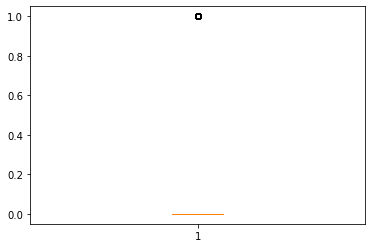

------------------------------------------------------------------------------------------------------------------------
CNT_FAM_MEMBERS


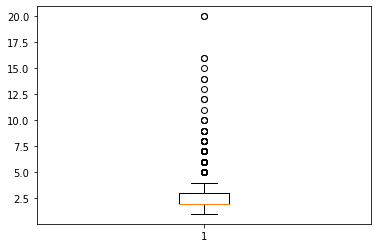

------------------------------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT


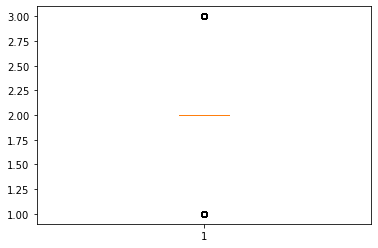

------------------------------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT_W_CITY


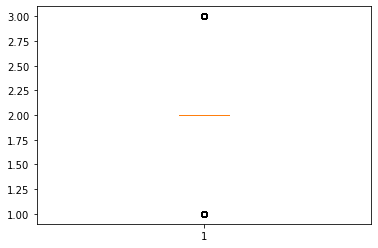

------------------------------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START


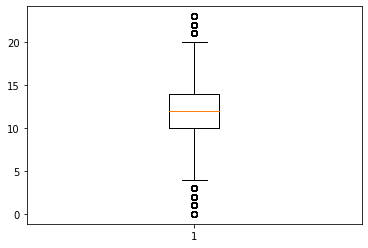

------------------------------------------------------------------------------------------------------------------------
REG_REGION_NOT_LIVE_REGION


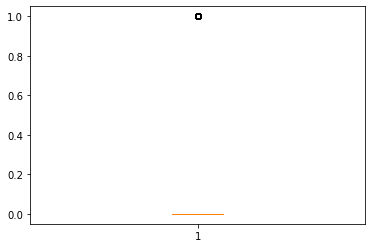

------------------------------------------------------------------------------------------------------------------------
REG_REGION_NOT_WORK_REGION


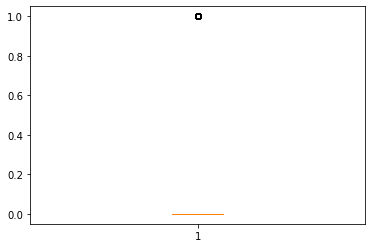

------------------------------------------------------------------------------------------------------------------------
LIVE_REGION_NOT_WORK_REGION


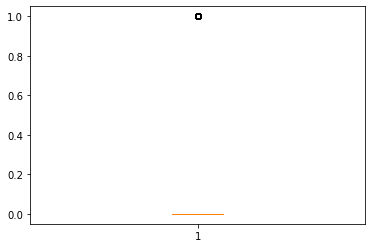

------------------------------------------------------------------------------------------------------------------------
REG_CITY_NOT_LIVE_CITY


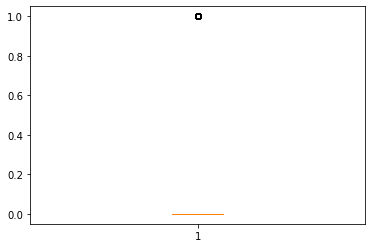

------------------------------------------------------------------------------------------------------------------------
REG_CITY_NOT_WORK_CITY


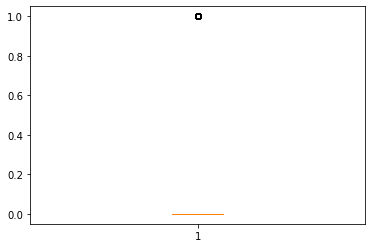

------------------------------------------------------------------------------------------------------------------------
LIVE_CITY_NOT_WORK_CITY


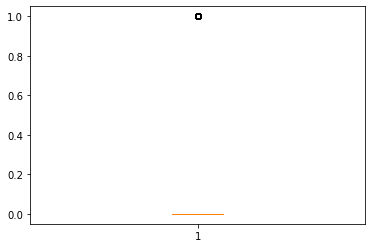

------------------------------------------------------------------------------------------------------------------------
EXT_SOURCE_2


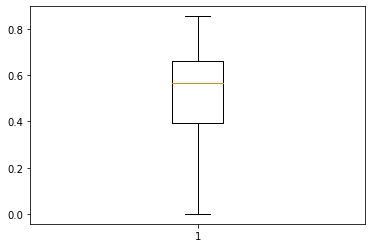

------------------------------------------------------------------------------------------------------------------------
EXT_SOURCE_3


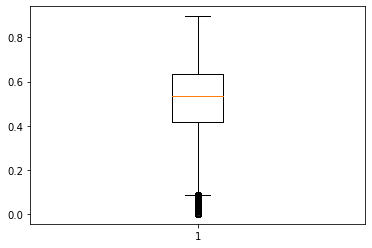

------------------------------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE


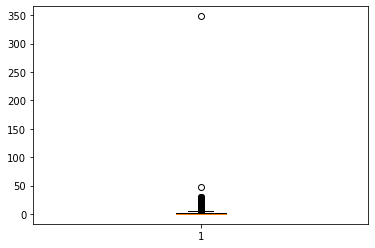

------------------------------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE


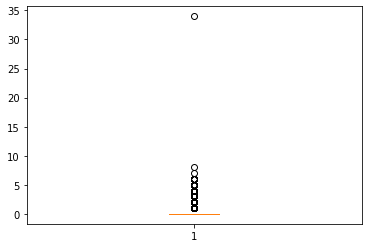

------------------------------------------------------------------------------------------------------------------------
OBS_60_CNT_SOCIAL_CIRCLE


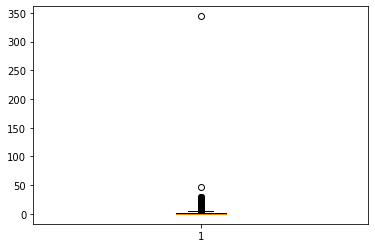

------------------------------------------------------------------------------------------------------------------------
DEF_60_CNT_SOCIAL_CIRCLE


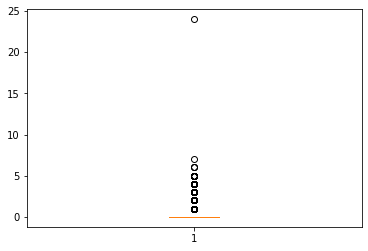

------------------------------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE


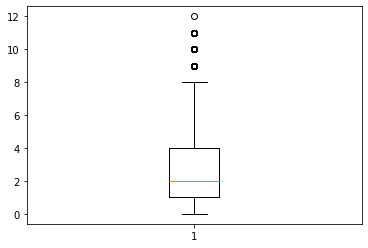

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_2


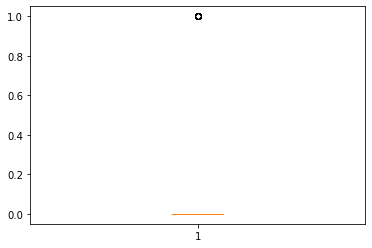

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_3


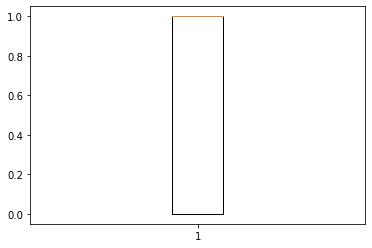

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_4


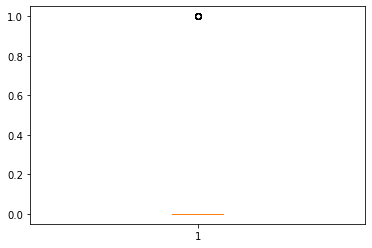

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_5


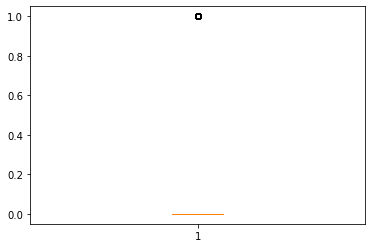

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_6


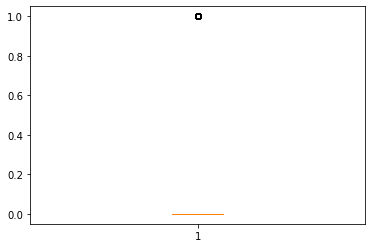

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_7


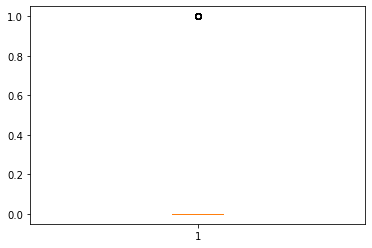

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_8


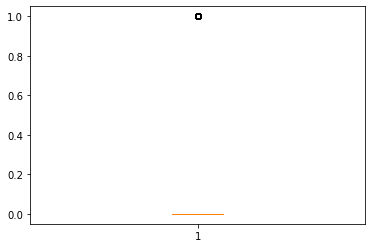

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_9


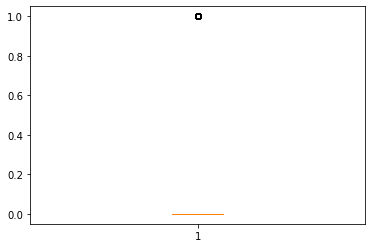

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_10


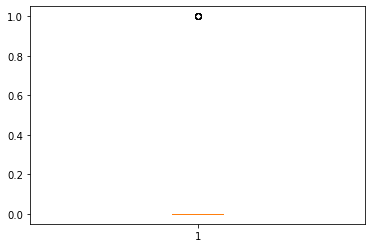

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_11


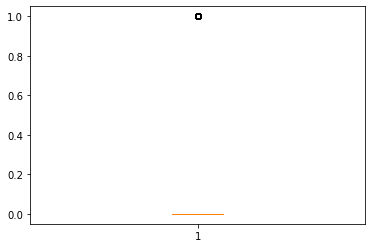

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_12


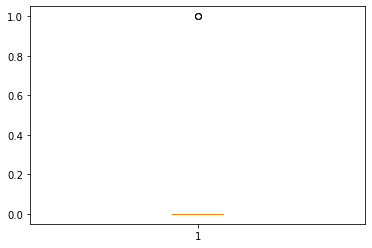

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_13


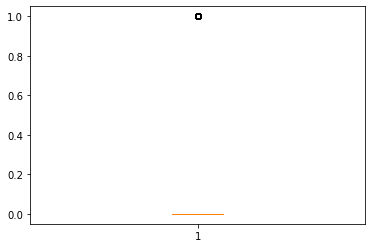

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_14


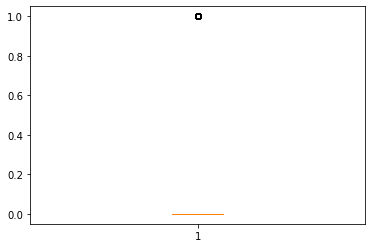

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_15


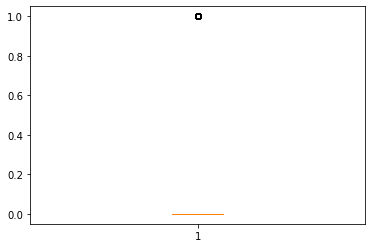

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_16


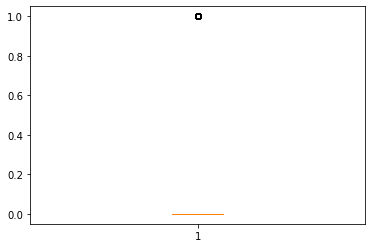

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_17


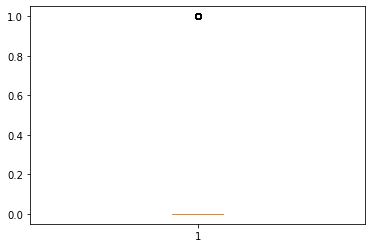

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_18


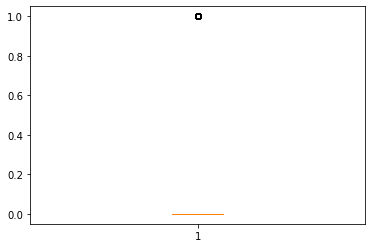

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_19


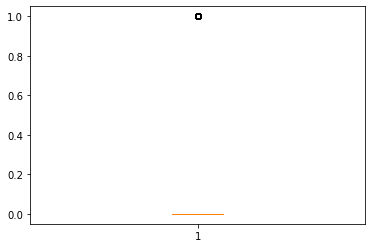

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_20


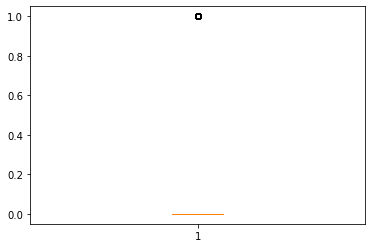

------------------------------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_21


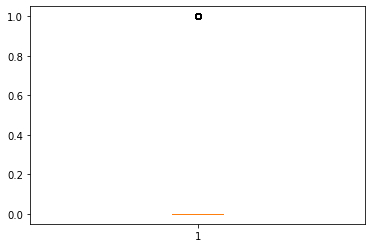

------------------------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR


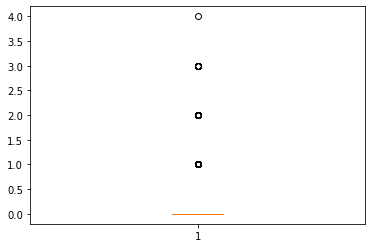

------------------------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY


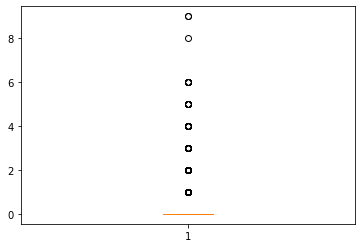

------------------------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_WEEK


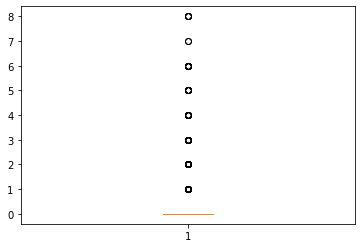

------------------------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON


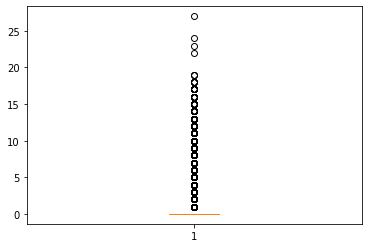

------------------------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT


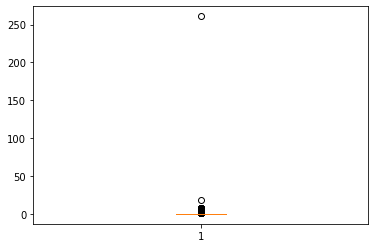

------------------------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR


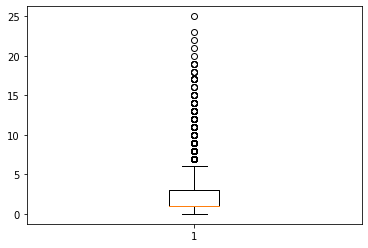

------------------------------------------------------------------------------------------------------------------------


In [15]:
for i in numerical_columns:
    print(i)
    plt.boxplot(application_data[i])
    plt.show()
    print('-'*120)

In [16]:
#deleting outliers
application_data=application_data.drop(application_data.loc[application_data['AMT_REQ_CREDIT_BUREAU_QRT'] > 50].index)
application_data=application_data.drop(application_data.loc[application_data['AMT_REQ_CREDIT_BUREAU_MON'] > 5].index)
application_data=application_data.drop(application_data.loc[application_data['DAYS_REGISTRATION'] > 50].index)
application_data=application_data.drop(application_data.loc[application_data['DAYS_EMPLOYED'] > 40].index)
application_data=application_data.drop(application_data.loc[application_data['OBS_30_CNT_SOCIAL_CIRCLE'] > 40].index)
application_data=application_data.drop(application_data.loc[application_data['AMT_INCOME_TOTAL'] > 110000000].index)
application_data=application_data.drop(application_data.loc[application_data['DEF_30_CNT_SOCIAL_CIRCLE'] > 30].index)
application_data=application_data.drop(application_data.loc[application_data['AMT_CREDIT'] > 2000000].index)

In [17]:
#removing ID column
application_data.drop("SK_ID_CURR", axis=1, inplace=True)

# Feature Selection

In [18]:
numericalData = application_data.select_dtypes(exclude=["object","category"]).copy()
X_numerical = numericalData.drop(["TARGET"], axis= "columns")
y_numerical = numericalData.TARGET

In [19]:
pd.DataFrame(
    [scipy.stats.pearsonr(X_numerical[col], 
    y_numerical) for col in X_numerical.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=X_numerical.columns,
).round(4)

,Pearson Corr.,p-value
CNT_CHILDREN,0.0073,0.0003
AMT_INCOME_TOTAL,-0.0282,0.0000
AMT_CREDIT,-0.0376,0.0000
AMT_ANNUITY,-0.0167,0.0000
AMT_GOODS_PRICE,-0.0478,0.0000
REGION_POPULATION_RELATIVE,-0.0393,0.0000
DAYS_BIRTH,-0.0652,0.0000
DAYS_EMPLOYED,-0.0745,0.0000
DAYS_REGISTRATION,-0.0357,0.0000
DAYS_ID_PUBLISH,-0.0395,0.0000


In [20]:
#list of numerical columns to drop whose p-value > 0.05
drop_numerical_columns = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_CONT_MOBILE','CNT_FAM_MEMBERS','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7','FLAG_DOCUMENT_10','FLAG_DOCUMENT_12','FLAG_DOCUMENT_17','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK']
drop_columns = ['FLAG_DOCUMENT_13','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_REGISTRATION','DAYS_EMPLOYED','DAYS_BIRTH','FLAG_DOCUMENT_18','FLAG_DOCUMENT_16','FLAG_DOCUMENT_15','FLAG_DOCUMENT_14','FLAG_DOCUMENT_11','FLAG_DOCUMENT_9','FLAG_DOCUMENT_8','FLAG_DOCUMENT_6','FLAG_DOCUMENT_3','FLAG_DOCUMENT_2','FLAG_EMAIL','FLAG_PHONE','FLAG_WORK_PHONE']

In [21]:
X_Categorical = application_data.select_dtypes(exclude=['int64','float64']).copy()
y_Categorical = application_data['TARGET']

In [22]:
for col in X_Categorical.columns:
    table = pd.crosstab(X_Categorical[col], y_Categorical)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"feature: {col} , p-value: {pval:.25f}")

feature: NAME_CONTRACT_TYPE , p-value: 0.0000000000000000000000000
feature: CODE_GENDER , p-value: 0.0000000000000000000000000
feature: FLAG_OWN_CAR , p-value: 0.0000000000000000000000000
feature: FLAG_OWN_REALTY , p-value: 0.1402828645987392042204789
feature: NAME_TYPE_SUITE , p-value: 0.0000023875943113435095813
feature: NAME_INCOME_TYPE , p-value: 0.0000000000000000000000000
feature: NAME_EDUCATION_TYPE , p-value: 0.0000000000000000000000000
feature: NAME_FAMILY_STATUS , p-value: 0.0000000000000000000000000
feature: NAME_HOUSING_TYPE , p-value: 0.0000000000000000000000000
feature: WEEKDAY_APPR_PROCESS_START , p-value: 0.0069261606788598092943054
feature: ORGANIZATION_TYPE , p-value: 0.0000000000000000000000000


In [23]:
application_data = application_data.drop(drop_numerical_columns, axis= "columns")
application_data = application_data.drop(drop_columns, axis= "columns")
application_data = application_data.drop(['ORGANIZATION_TYPE'], axis= "columns")

# Encoding Categorical columns

In [24]:
X_Categorical = application_data.select_dtypes(exclude=['int64','float64']).copy()
application_data = pd.get_dummies(application_data, columns=X_Categorical.columns)

In [25]:
application_data.shape

(248769, 68)

# Seperating dependent & independent variables

In [26]:
X = application_data.drop(["TARGET"], axis= "columns")
y = application_data['TARGET']

As we have highly imbalanced data, we will be using some sampling techniques and metric used to estimate the model performance is F1_Score

# Train Test Split

In [27]:
def train_test_data(X,y,scaling):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    
    if scaling == 'Min-Max':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
        
    features_names = X_train.columns
    X_train = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train, columns = features_names)
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test, columns = features_names)
    
    return X_train, X_test, y_train, y_test

    

In [28]:
X_train, X_test, y_train, y_test = train_test_data(X,y,'Min-Max')

In [29]:
print('X_train shape - ', X_train.shape)
print('y_train shape - ', y_train.shape)
print('X_test shape - ', X_test.shape)
print('y_test shape - ', y_test.shape)

X_train shape -  (199015, 67)
y_train shape -  (199015,)
X_test shape -  (49754, 67)
y_test shape -  (49754,)


# Undersampling

In [24]:
# instantiating the random undersampler
underSampler = RandomUnderSampler() 

# resampling X, y
X_underSampler, y_underSampler = underSampler.fit_resample(X_train, y_train)
X_underSampler_test, y_underSampler_test = underSampler.fit_resample(X_test, y_test)

# new class distribution
print('Original train dataset shape %s' % Counter(y_train))
print('Resampled train dataset shape %s' % Counter(y_underSampler))

print('Original test dataset shape %s' % Counter(y_test))
print('Resampled test dataset shape %s' % Counter(y_underSampler_test))

Original train dataset shape Counter({0: 181638, 1: 17377})
Resampled train dataset shape Counter({0: 17377, 1: 17377})
Original test dataset shape Counter({0: 45426, 1: 4328})
Resampled test dataset shape Counter({0: 4328, 1: 4328})


In [25]:
Data_Under = pd.concat([X_underSampler, y_underSampler], axis=1)

# Oversampling

In [26]:
# instantiating the random over sampler 
overSampler = RandomOverSampler()

# resampling X, y
X_overSampler, y_overSampler = overSampler.fit_resample(X_train, y_train)
X_overSampler_test, y_overSampler_test = overSampler.fit_resample(X_test, y_test)

# new class distribution
print('Original train dataset shape %s' % Counter(y_train))
print('Resampled train dataset shape %s' % Counter(y_overSampler))

print('Original test dataset shape %s' % Counter(y_test))
print('Resampled test dataset shape %s' % Counter(y_overSampler_test))

Original train dataset shape Counter({0: 181638, 1: 17377})
Resampled train dataset shape Counter({1: 181638, 0: 181638})
Original test dataset shape Counter({0: 45426, 1: 4328})
Resampled test dataset shape Counter({0: 45426, 1: 45426})


In [27]:
Data_Over = pd.concat([X_overSampler, y_overSampler], axis=1)

# Hybridsampling

In [28]:
# instantiating over and under sampler
hybridOverSampler = RandomOverSampler(sampling_strategy=0.5)
hybridUnderSampler = RandomUnderSampler(sampling_strategy=1)

# first performing oversampling to minority class
X_hybridOverSampler, y_hybridOverSampler = hybridOverSampler.fit_resample(X_train, y_train)
X_hybridOverSampler_test, y_hybridOverSampler_test = hybridOverSampler.fit_resample(X_test, y_test)

# now to combine under sampling 
X_combined_sampling, y_combined_sampling = hybridUnderSampler.fit_resample(X_hybridOverSampler, y_hybridOverSampler)
X_combined_sampling_test, y_combined_sampling_test = hybridUnderSampler.fit_resample(X_hybridOverSampler_test, y_hybridOverSampler_test)

# new class distribution
print('Original train dataset shape %s' % Counter(y_train))
print('Resampled train dataset shape %s' % Counter(y_combined_sampling))

print('Original test dataset shape %s' % Counter(y_test))
print('Resampled test dataset shape %s' % Counter(y_combined_sampling_test))

Original train dataset shape Counter({0: 181638, 1: 17377})
Resampled train dataset shape Counter({0: 90819, 1: 90819})
Original test dataset shape Counter({0: 45426, 1: 4328})
Resampled test dataset shape Counter({0: 22713, 1: 22713})


In [29]:
Data_Hybrid = pd.concat([X_combined_sampling, y_combined_sampling], axis=1)

# Hybrid Sampling using SMOTE

In [30]:
hybridSMOTE = SMOTETomek()
X_SMOTE,y_SMOTE = hybridSMOTE.fit_resample(X_train,y_train)
X_SMOTE_test,y_SMOTE_test = hybridSMOTE.fit_resample(X_test,y_test)

# new class distribution
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_SMOTE))

print('Original test dataset shape %s' % Counter(y_test))
print('Resampled test dataset shape %s' % Counter(y_SMOTE_test))

Original dataset shape Counter({0: 181638, 1: 17377})
Resampled dataset shape Counter({1: 181275, 0: 181275})
Original test dataset shape Counter({0: 45426, 1: 4328})
Resampled test dataset shape Counter({0: 45370, 1: 45370})


In [31]:
#Data_SMOTE = pd.concat([X_SMOTE, y_SMOTE], axis=1)
Data_SMOTE_test = pd.concat([X_SMOTE_test, y_SMOTE_test], axis=1)

In [32]:
Data_SMOTE.to_csv('Data_SMOTE.csv')
Data_SMOTE_test.to_csv('Data_SMOTE_test.csv')

In [50]:
Data_SMOTE = pd.read_csv('Data_SMOTE.csv')
Data_SMOTE_test = pd.read_csv('Data_SMOTE_test.csv')

In [51]:
X_SMOTE = Data_SMOTE.drop(["TARGET"], axis= "columns")
y_SMOTE = Data_SMOTE['TARGET']

X_SMOTE_test = Data_SMOTE_test.drop(["TARGET"], axis= "columns")
y_SMOTE_test = Data_SMOTE_test['TARGET']

# Confusion Matrix

In [35]:
def confusion_matrix_scratch(y,y_pred):
    TP = sum((y==1) & (y_pred == 1))
    TN = sum((y==0) & (y_pred == 0))
    FP = sum((y==0) & (y_pred == 1))
    FN = sum((y==1) & (y_pred == 0))
    
    return TP, TN, FP, FN

In [36]:
def plot_confusionMatrix(y_test,y_pred):
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    

In [37]:
def results(y_test,y_prob,threshold):

    y_pred = (y_prob > threshold).astype(int)
    
    TP, TN, FP, FN = confusion_matrix_scratch(y_test, y_pred)

    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(TN+FP)
    FNR = FN/(TP+FN)
    
    print('TPR - ', TPR)
    print('TNR - ', TNR)
    print('FPR - ', FPR)
    print('FNR - ', FNR)
    
    return y_pred
    

# Logistic Regression

In [37]:
def logistic_regression(X_train, X_test, y_train, y_test):
    
    model = LogisticRegression(max_iter = 1000,n_jobs=None, penalty='l2', solver = 'lbfgs', random_state = 0 )
    parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100,1000]}
    classifier = GridSearchCV(model, parameters, cv = 5).fit(X_train, y_train)
    
    model = classifier.best_estimator_
    model.fit(X_train, y_train)
    
    y_prob = model.predict_proba(X_test)[:,1]
    
    print(model)
    return X_test, y_test, y_prob

## Logistic Regression with under sampled data and Min-Max scaling

In [38]:
X_underSampler_test, y_underSampler_test, y_prob = logistic_regression(X_underSampler,X_underSampler_test, y_underSampler, y_underSampler_test)

LogisticRegression(C=10, max_iter=1000, random_state=0)


In [39]:
y_pred = results(y_underSampler_test,y_prob,0.5)

TPR -  0.6682070240295749
TNR -  0.6825323475046211
FPR -  0.31746765249537895
FNR -  0.3317929759704251


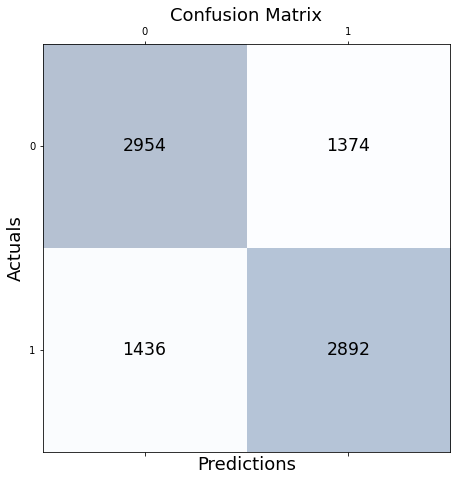

In [40]:
plot_confusionMatrix(y_underSampler_test,y_pred)

In [41]:
f1_score(y_underSampler_test,y_pred)

0.6730276937398185

## Logistic Regression with over sampled data and Min-Max scaling

In [42]:
X_overSampler_test, y_overSampler_test, y_prob = logistic_regression(X_overSampler, X_overSampler_test, y_overSampler, y_overSampler_test)

LogisticRegression(C=10, max_iter=1000, random_state=0)


In [43]:
y_pred = results(y_overSampler_test,y_prob,0.5)

TPR -  0.6728525514022806
TNR -  0.6819442609959054
FPR -  0.31805573900409456
FNR -  0.3271474485977194


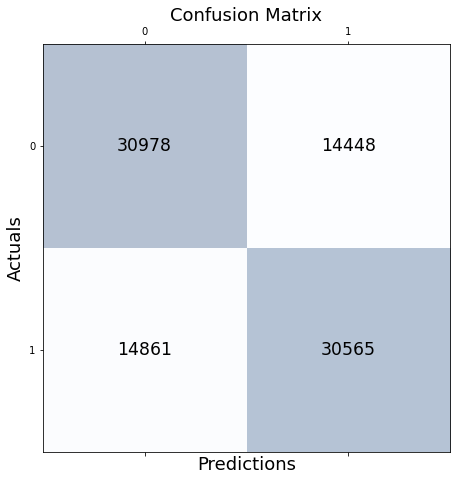

In [44]:
plot_confusionMatrix(y_overSampler_test,y_pred)

In [45]:
f1_score(y_overSampler_test,y_pred)

0.6759252092570682

## Logistic Regression with Hybrid sampled data and Min-Max scaling

In [46]:
X_combined_sampling_test, y_combined_sampling_test, y_prob = logistic_regression(X_combined_sampling, X_combined_sampling_test, y_combined_sampling, y_combined_sampling_test)

LogisticRegression(C=1, max_iter=1000, random_state=0)


In [47]:
y_pred = results(y_combined_sampling_test,y_prob,0.5)

TPR -  0.6671509708096685
TNR -  0.6784660766961652
FPR -  0.3215339233038348
FNR -  0.33284902919033155


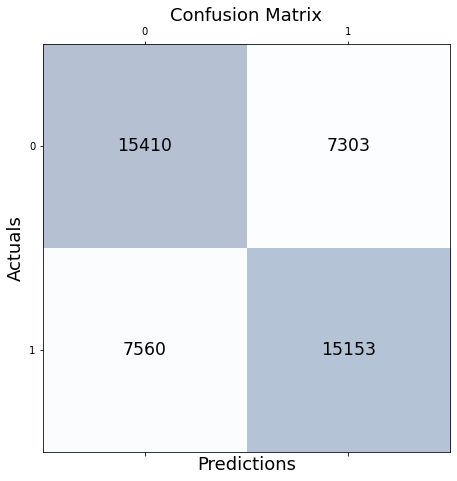

In [48]:
plot_confusionMatrix(y_combined_sampling_test,y_pred)

In [49]:
f1_score(y_combined_sampling_test,y_pred)

0.6709468883526313

## Logistic Regression with Hybrid SMOTE data and Min-Max scaling

In [50]:
X_SMOTE_test, y_SMOTE_test, y_prob = logistic_regression(X_SMOTE, X_SMOTE_test, y_SMOTE, y_SMOTE_test)

LogisticRegression(C=1000, max_iter=1000, random_state=0)


In [51]:
y_pred = results(y_SMOTE_test,y_prob,0.5)

TPR -  0.6950859409431468
TNR -  0.6834288232701631
FPR -  0.3165711767298369
FNR -  0.30491405905685326


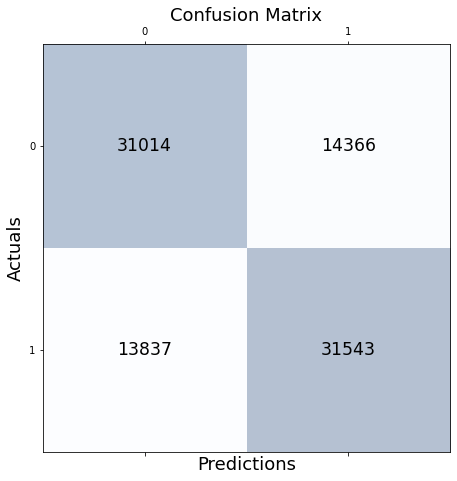

In [52]:
plot_confusionMatrix(y_SMOTE_test,y_pred)

In [53]:
f1_score(y_SMOTE_test,y_pred)

0.6910580683324389

# Decision Trees

In [54]:
def decision_tree(X_train, X_test, y_train, y_test):
    max_depth_list = [5,10,20,30,40,45,50,60]
    previous_score = 0
    max_depth = 1
    
    for i in max_depth_list:
        classifier = tree.DecisionTreeClassifier(random_state = 42, max_depth = i).fit(X_train, y_train)
        current_score = classifier.score(X_test, y_test)
        
        
        if previous_score < current_score:
            previous_score = current_score
            max_depth = i
            
    classifier = tree.DecisionTreeClassifier(random_state = 42, max_depth = max_depth).fit(X_train, y_train)
            
    y_prob = classifier.predict_proba(X_test)[:,1]

    print(classifier)
    
    return classifier, X_test, y_test, y_prob
    

## Decision Tree with Under sampled data and Min-Max scaling

In [55]:
model, X_underSampler_test, y_underSampler_test, y_prob = decision_tree(X_underSampler, X_underSampler_test, y_underSampler, y_underSampler_test)

DecisionTreeClassifier(max_depth=5, random_state=42)


In [56]:
y_pred = results(y_underSampler_test,y_prob,0.5)

TPR -  0.6594269870609981
TNR -  0.6511090573012939
FPR -  0.3488909426987061
FNR -  0.34057301293900183


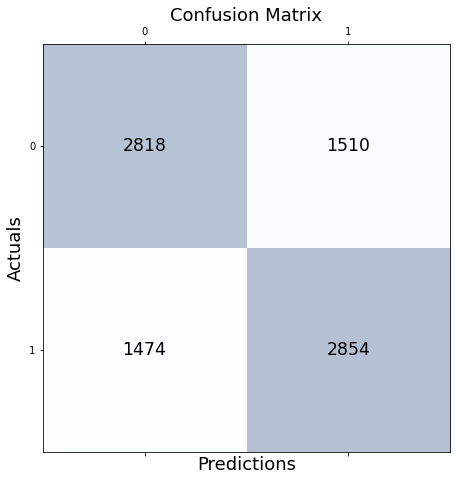

In [57]:
plot_confusionMatrix(y_underSampler_test,y_pred)

In [58]:
f1_score(y_underSampler_test,y_pred)

0.6566958122411413

## Decision Tree with Over sampled data and Min-Max scaling

In [59]:
model, X_overSampler_test, y_overSampler_test, y_prob = decision_tree(X_overSampler, X_overSampler_test, y_overSampler, y_overSampler_test)

DecisionTreeClassifier(max_depth=5, random_state=42)


In [60]:
y_pred = results(y_overSampler_test,y_prob,0.5)

TPR -  0.5690353542024391
TNR -  0.7360322282393343
FPR -  0.2639677717606657
FNR -  0.4309646457975609


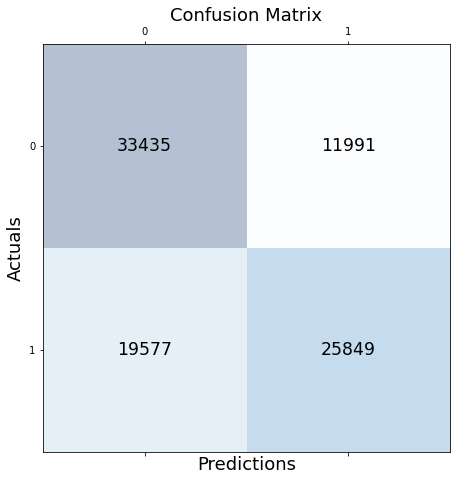

In [61]:
plot_confusionMatrix(y_overSampler_test,y_pred)

In [62]:
f1_score(y_overSampler_test,y_pred)

0.6208776691566786

## Decision Tree with Hybrid sampled data and Min-Max scaling

In [63]:
model, X_combined_sampling_test, y_combined_sampling_test, y_prob = decision_tree(X_combined_sampling, X_combined_sampling_test, y_combined_sampling, y_combined_sampling_test)

DecisionTreeClassifier(max_depth=5, random_state=42)


In [64]:
y_pred = results(y_combined_sampling_test,y_prob,0.5)

TPR -  0.5662836261172016
TNR -  0.7296702329062651
FPR -  0.27032976709373485
FNR -  0.4337163738827984


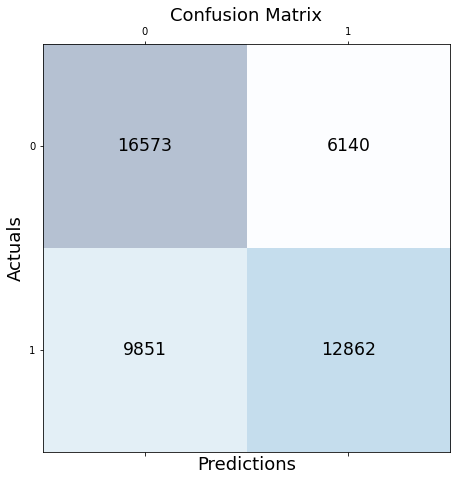

In [65]:
plot_confusionMatrix(y_combined_sampling_test,y_pred)

In [66]:
f1_score(y_combined_sampling_test,y_pred)

0.6166606736186024

## Decision Tree with SMOTE sampled data and Min-Max scaling

In [67]:
model, X_SMOTE_test, y_SMOTE_test, y_prob = decision_tree(X_SMOTE, X_SMOTE_test, y_SMOTE, y_SMOTE_test)

DecisionTreeClassifier(max_depth=20, random_state=42)


In [68]:
y_pred = results(y_SMOTE_test,y_prob,0.5)

TPR -  0.8553107095636845
TNR -  0.9269722344645218
FPR -  0.07302776553547818
FNR -  0.14468929043631557


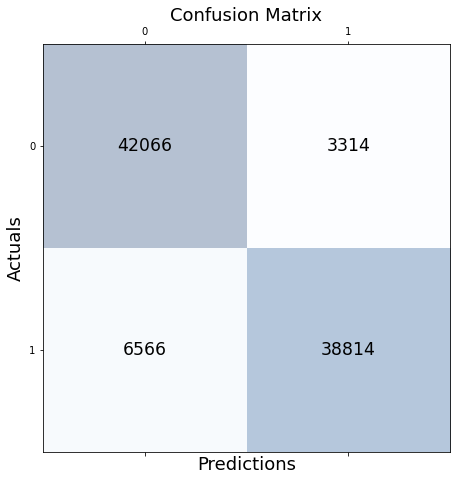

In [69]:
plot_confusionMatrix(y_SMOTE_test,y_pred)

In [70]:
f1_score(y_SMOTE_test,y_pred)

0.8870960369337662

# Random Forest

In [71]:
random_Forest = RandomForestClassifier(random_state = 0, class_weight = None).fit(X_SMOTE, y_SMOTE)
parameters = {'n_estimators':[10, 100, 500, 1000]}
random_Forest_Classifier = GridSearchCV(random_Forest, parameters, cv = 5).fit(X_SMOTE, y_SMOTE)

y_prob_RF = random_Forest_Classifier.predict_proba(X_SMOTE_test)[:,1]

In [72]:
y_pred_RF = results(y_SMOTE_test,y_prob_RF,0.5)

TPR -  0.8411194358748347
TNR -  0.9964301454385192
FPR -  0.0035698545614808288
FNR -  0.15888056412516527


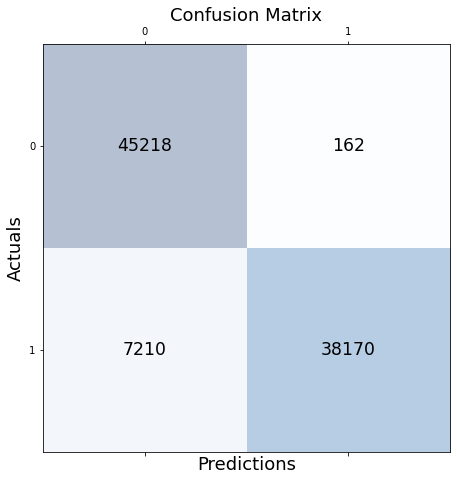

In [73]:
plot_confusionMatrix(y_SMOTE_test,y_pred_RF)

In [74]:
f1_score(y_SMOTE_test,y_pred_RF)

0.9119361620795108

In [58]:
clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf.fit(X_SMOTE, y_SMOTE)
pred = clf.predict_proba(X_SMOTE_test)[:,1]


In [59]:
y_pred = results(y_SMOTE_test,pred,0.5)

TPR -  0.9024245095878334
TNR -  0.9953934317831166
FPR -  0.004606568216883403
FNR -  0.09757549041216663


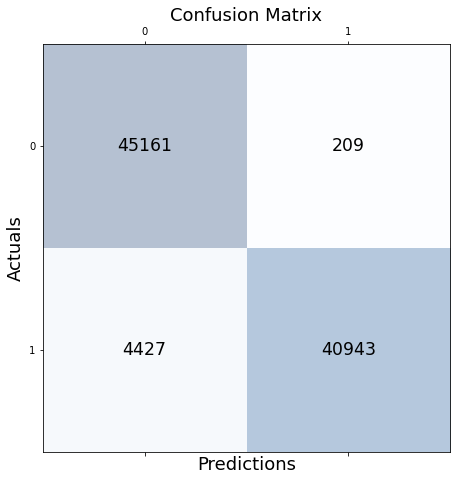

In [62]:
plot_confusionMatrix(y_SMOTE_test,y_pred)

In [60]:
f1_score(y_SMOTE_test,y_pred)

0.9464182520052703

In [77]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_SMOTE, y_SMOTE)
y_pred_xgb = xgb.predict_proba(X_SMOTE_test)[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:39:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [78]:
y_pred = results(y_SMOTE_test,y_pred_xgb,0.5)

TPR -  0.9098964073176108
TNR -  0.989905223716112
FPR -  0.010094776283888031
FNR -  0.09010359268238924


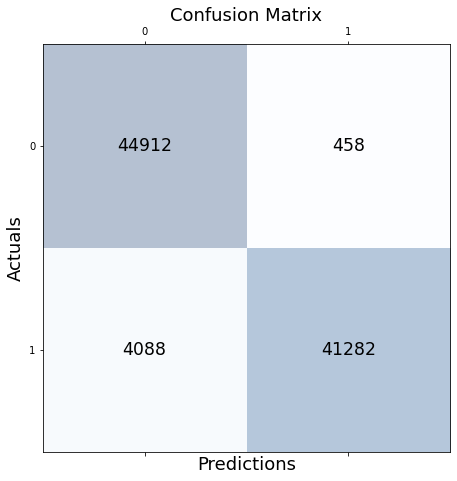

In [79]:
plot_confusionMatrix(y_SMOTE_test,y_pred)

In [80]:
f1_score(y_SMOTE_test,y_pred)

0.9478131098610952

# MLP Classifier

In [91]:
MLP_Classifier = MLPClassifier(solver = 'adam', random_state = 42, max_iter = 1000 )
parameters = {'hidden_layer_sizes': [(64,32,16)], 'learning_rate_init':[0.01]}
best_MLP_Classifier = GridSearchCV(MLP_Classifier, parameters, cv = 5).fit(X_SMOTE, y_SMOTE)

y_prob_MLP = best_MLP_Classifier.predict_proba(X_SMOTE_test)[:,1]

In [92]:
y_pred_MLP = results(y_SMOTE_test,y_prob_MLP,0.5)

TPR -  0.821859850154253
TNR -  0.8420229175848392
FPR -  0.15797708241516087
FNR -  0.17814014984574703


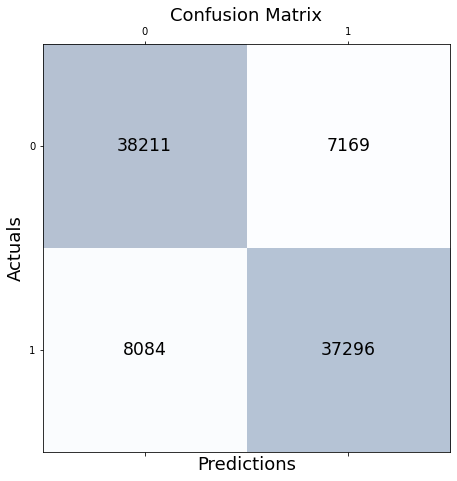

In [93]:
plot_confusionMatrix(y_SMOTE_test,y_pred_MLP)

In [94]:
f1_score(y_SMOTE_test,y_pred_MLP)

0.8302298402804831

In [97]:
MLP_Classifier = MLPClassifier(solver = 'adam', random_state = 42, max_iter = 1000 )
parameters = {'hidden_layer_sizes': [(68,)], 'learning_rate_init':[0.01]}
best_MLP_Classifier = GridSearchCV(MLP_Classifier, parameters, cv = 5).fit(X_SMOTE, y_SMOTE)

y_prob_MLP = best_MLP_Classifier.predict_proba(X_SMOTE_test)[:,1]

In [98]:
y_pred_MLP = results(y_SMOTE_test,y_prob_MLP,0.5)

TPR -  0.8122520934332305
TNR -  0.7747465843984134
FPR -  0.2252534156015866
FNR -  0.1877479065667695


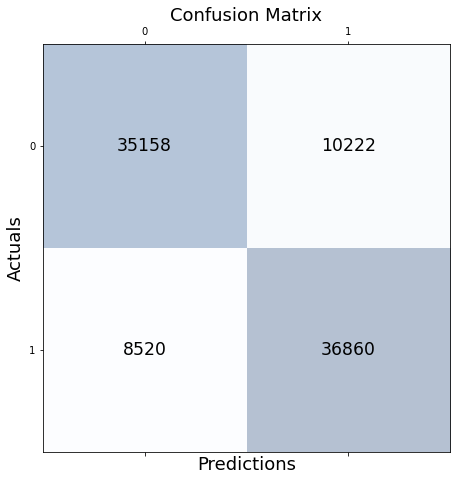

In [99]:
plot_confusionMatrix(y_SMOTE_test,y_pred_MLP)

In [100]:
f1_score(y_SMOTE_test,y_pred_MLP)

0.7973005126430316

In [103]:
MLP_Classifier = MLPClassifier(solver = 'adam', random_state = 42, max_iter = 1000 )
parameters = {'hidden_layer_sizes': [(68,64,32,16,8,4)], 'learning_rate_init':[0.001]}
best_MLP_Classifier = GridSearchCV(MLP_Classifier, parameters, cv = 5).fit(X_SMOTE, y_SMOTE)

y_prob_MLP = best_MLP_Classifier.predict_proba(X_SMOTE_test)[:,1]

In [104]:
y_pred_MLP = results(y_SMOTE_test,y_prob_MLP,0.5)

TPR -  0.706170118995152
TNR -  0.8301895107977082
FPR -  0.16981048920229175
FNR -  0.29382988100484797


In [105]:
f1_score(y_SMOTE_test,y_pred_MLP)

0.7528543908283606

In [106]:
MLP_Classifier = MLPClassifier(solver = 'adam', random_state = 42, max_iter = 1000 )
parameters = {'hidden_layer_sizes': [(68,64,32)], 'learning_rate_init':[0.001]}
best_MLP_Classifier = GridSearchCV(MLP_Classifier, parameters, cv = 5).fit(X_SMOTE, y_SMOTE)

y_prob_MLP = best_MLP_Classifier.predict_proba(X_SMOTE_test)[:,1]

In [110]:
y_pred_MLP = results(y_SMOTE_test,y_prob_MLP,0.5)

TPR -  0.7204715733803437
TNR -  0.8749008373732922
FPR -  0.1250991626267078
FNR -  0.2795284266196562


In [111]:
f1_score(y_SMOTE_test,y_pred_MLP)

0.7807574744483714

#  Summary of Models

In [74]:
samplingSummaryTable = PrettyTable(["Model","Data","F1-Score"])

In [75]:
samplingSummaryTable.add_row(["LogisticRegression", "UnderSampling", "0.673"])
samplingSummaryTable.add_row(["LogisticRegression", "OverSampling", "0.676"])
samplingSummaryTable.add_row(["LogisticRegression", "HybridSampling", "0.671"])
samplingSummaryTable.add_row(["LogisticRegression", "Smote", "0.691"])
samplingSummaryTable.add_row(["DecisionTree", "UnderSampling", "0.657"])
samplingSummaryTable.add_row(["DecisionTree", "OverSampling", "0.621"])
samplingSummaryTable.add_row(["DecisionTree", "HybridSampling", "0.617"])
samplingSummaryTable.add_row(["DecisionTree", "Smote", "0.887"])
samplingSummaryTable.add_row(["RandomForest", "Smote", "0.912"])
samplingSummaryTable.add_row(["AdaBoost", "Smote", "0.946"])
samplingSummaryTable.add_row(["XgBoost", "Smote", "0.948"])
samplingSummaryTable.add_row(["MLP", "Smote", "0.830"])

In [76]:
print(samplingSummaryTable)

+--------------------+----------------+----------+
|       Model        |      Data      | F1-Score |
+--------------------+----------------+----------+
| LogisticRegression | UnderSampling  |  0.673   |
| LogisticRegression |  OverSampling  |  0.676   |
| LogisticRegression | HybridSampling |  0.671   |
| LogisticRegression |     Smote      |  0.691   |
|    DecisionTree    | UnderSampling  |  0.657   |
|    DecisionTree    |  OverSampling  |  0.621   |
|    DecisionTree    | HybridSampling |  0.617   |
|    DecisionTree    |     Smote      |  0.887   |
|    RandomForest    |     Smote      |  0.912   |
|      AdaBoost      |     Smote      |  0.946   |
|      XgBoost       |     Smote      |  0.948   |
|        MLP         |     Smote      |  0.830   |
+--------------------+----------------+----------+


# Conclusion

As increase in FN or FP impact bank revenue negatively it is better to have model that has high TNR, TPR and there is always trae-off between them. With F1_score details and TP,TN,FP,FN values <b>XgBoost classifier with SMOTE sampled data is the best model.<b>